# Analyse Exploratoire des Ventes d'une Chaine de vente d'electroniques 

Nous avons dans le dossier datasets/SalesAnalysis des données de ventes d'une entreprise sur l'année 2019. Vous avez un fichier csv par mois.

Chaque fichier contient les colonnes suivantes:
* OrderID: l'identifiant unique de la commande
* Product: La désignation du produit
* Quantity Ordered: la quantité vendue
* Price each: le prix unitaire
* order date : La date d'achat
* Purchase adress: l'adresse de la boutique de vente

Nous allons analyser ces données pour répondre aux questions suivantes:

* Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?
* Dans quelle ville a-t-on le plus vendu de produits ?
* A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?
* Quels sont les produits qui sont souvent achetés ensemble ?
* Quel produit a-t-on le plus vendu et pourquoi ?

Nous allons accompagner nos solutions de visualisations pertinentes afin d'aider le business à améliorer ses chiffres de l'année suivante.



## Importer les données

Essayons de Monter notre google drive

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [38]:
janvier_sales = pd.read_csv("Sales_January_2019.csv")

In [39]:
janvier_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [40]:
janvier_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


In [41]:
janvier_sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [42]:
janvier_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


## Merger la data

In [43]:
files = [fichier for fichier in os.listdir() if fichier.endswith('.csv')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [44]:
df = pd.DataFrame()

for file in files:
  data_interm = pd.read_csv(file)
  df = pd.concat([df, data_interm])


In [45]:
df.shape

(186850, 6)

In [46]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


## Nettoyage de la data

In [48]:
df.isnull().sum(axis=0)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

##### Les valeurs manquantes :

In [49]:
val_manquantes = df[df.isnull().any(axis=1)]
val_manquantes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


#### Verifier si les lignes n'ont que des valeurs manquantes :

In [50]:
val_manquantes.isnull().all()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

Supprimer toutes les lignes avec des valeurs manquantes: 

In [51]:
df.shape

(186850, 6)

In [52]:
df.dropna(inplace=True)

In [53]:
df.shape

(186305, 6)

In [54]:
df.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [55]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


Débarassons-nous des lignes avec des valeurs abérantes

In [56]:
df[df['Order Date'] == "Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [57]:
"1548".isdigit()

True

In [58]:
df.loc[~df['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [59]:
df.drop(df['Order Date'] == "Order Date")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [60]:
df_clean = df.drop(df.loc[df['Order Date'] == "Order Date", :].index)

In [61]:
df_clean.loc[~df_clean['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Changement des Types

In [62]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [63]:
df_clean['Quantity Ordered'] = df_clean['Quantity Ordered'].astype('int')

<ipython-input-63-5f94bcfa6949>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Quantity Ordered'] = df_clean['Quantity Ordered'].astype('int')


In [64]:
df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'])

<ipython-input-64-f3ef5ea88141>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'])


In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          182735 non-null  object 
 1   Product           182735 non-null  object 
 2   Quantity Ordered  182735 non-null  int32  
 3   Price Each        182735 non-null  float64
 4   Order Date        182735 non-null  object 
 5   Purchase Address  182735 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 9.1+ MB


In [66]:
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

<ipython-input-66-8bd24490f977>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])


In [67]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int32         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.1+ MB


In [68]:
df['Order Date']

0        04/19/19 08:46
2        04/07/19 22:30
3        04/12/19 14:38
4        04/12/19 14:38
5        04/30/19 09:27
              ...      
11681    09/17/19 20:56
11682    09/01/19 16:00
11683    09/23/19 07:39
11684    09/19/19 17:30
11685    09/30/19 00:18
Name: Order Date, Length: 186305, dtype: object

In [69]:
df_clean['Order Date']

0       2019-04-19 08:46:00
2       2019-04-07 22:30:00
3       2019-04-12 14:38:00
4       2019-04-12 14:38:00
5       2019-04-30 09:27:00
                ...        
11681   2019-09-17 20:56:00
11682   2019-09-01 16:00:00
11683   2019-09-23 07:39:00
11684   2019-09-19 17:30:00
11685   2019-09-30 00:18:00
Name: Order Date, Length: 182735, dtype: datetime64[ns]

## Analyse Exploratoire proprement dite

## Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?

In [70]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [71]:
df_clean.index

Int64Index([    0,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            11676, 11677, 11678, 11679, 11680, 11681, 11682, 11683, 11684,
            11685],
           dtype='int64', length=182735)

In [72]:
df_clean  = df_clean.set_index('Order Date')

In [73]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001"
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215"
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001"
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001"
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001"


In [74]:
df_clean.sort_index(inplace=True)

In [75]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001"
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016"
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001"
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001"
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301"


In [76]:
df_clean['Month'] = df_clean.index.month_name()

In [77]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January


In [78]:
df_clean['chiffre_daffaire'] = df_clean['Quantity Ordered'] * df_clean['Price Each']

In [79]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire
Order Date,,,,,,,
2019-04-12 11:11:00,186756,AA Batteries (4-pack),2,3.84,"452 2nd St, Los Angeles, CA 90001",April,7.68
2019-03-24 12:33:00,169133,AAA Batteries (4-pack),1,2.99,"66 North St, Seattle, WA 98101",March,2.99
2019-08-28 22:59:00,237794,Lightning Charging Cable,1,14.95,"461 West St, San Francisco, CA 94016",August,14.95
2019-05-31 19:14:00,203546,AA Batteries (4-pack),1,3.84,"558 West St, Seattle, WA 98101",May,3.84
2019-10-24 10:28:00,273836,iPhone,1,700.00,"160 Center St, San Francisco, CA 94016",October,700.00


In [80]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().sort_values(ascending=False)

Month
December     4.557905e+06
October      3.679254e+06
April        3.336376e+06
November     3.149785e+06
May          3.101881e+06
March        2.755969e+06
July         2.587445e+06
June         2.524465e+06
August       2.191698e+06
February     2.158127e+06
September    2.050361e+06
January      1.786511e+06
Name: chiffre_daffaire, dtype: float64

In [81]:
order = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]

In [82]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order]

Month
January      1.786511e+06
February     2.158127e+06
March        2.755969e+06
April        3.336376e+06
May          3.101881e+06
June         2.524465e+06
July         2.587445e+06
August       2.191698e+06
September    2.050361e+06
October      3.679254e+06
November     3.149785e+06
December     4.557905e+06
Name: chiffre_daffaire, dtype: float64

Text(0.5, 1.0, "Chiffre d'affaire global par mois")

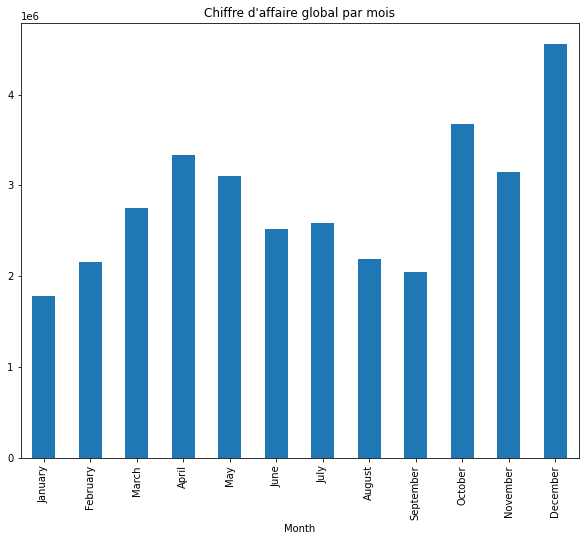

In [83]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order].plot.bar(figsize=(10, 8))
plt.title("Chiffre d'affaire global par mois")

In [84]:
df_clean.groupby('Month').sum()["chiffre_daffaire"].sort_values(ascending=False).December

4557905.420001525

Décembre est le mois avec le plus de ventes et le CA est de 4557905.420001525

## La ville le produits le plus vendu

In [85]:
df_clean['Purchase Address'].unique()

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [86]:
def get_ville(addresse):
  return addresse.split(',')[1].strip()

In [87]:
"        python        ".strip()

'python'

In [88]:
get_ville("760 Church St, San Francisco, CA 94016")

'San Francisco'

In [89]:
df_clean['ville'] = df_clean['Purchase Address'].apply(get_ville)

In [90]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville
Order Date,,,,,,,,
2019-10-26 19:14:00,271621,Lightning Charging Cable,1,14.95,"134 Meadow St, Boston, MA 02215",October,14.95,Boston
2019-11-08 14:34:00,289086,USB-C Charging Cable,1,11.95,"811 10th St, Portland, OR 97035",November,11.95,Portland
2019-12-01 14:56:00,297179,USB-C Charging Cable,1,11.95,"647 Wilson St, Seattle, WA 98101",December,11.95,Seattle
2019-01-02 16:55:00,145369,AAA Batteries (4-pack),1,2.99,"70 7th St, Dallas, TX 75001",January,2.99,Dallas
2019-12-20 15:12:00,300899,Wired Headphones,1,11.99,"628 10th St, Dallas, TX 75001",December,11.99,Dallas


In [91]:
df_clean['ville'].unique()

array(['New York City', 'San Francisco', 'Dallas', 'Atlanta', 'Boston',
       'Seattle', 'Los Angeles', 'Portland', 'Austin'], dtype=object)

In [92]:
df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False)

ville
San Francisco    8.124121e+06
Los Angeles      5.354040e+06
New York City    4.581659e+06
Boston           3.604081e+06
Atlanta          2.741642e+06
Dallas           2.717794e+06
Seattle          2.693049e+06
Portland         2.276649e+06
Austin           1.786746e+06
Name: chiffre_daffaire, dtype: float64

<AxesSubplot:ylabel='ville'>

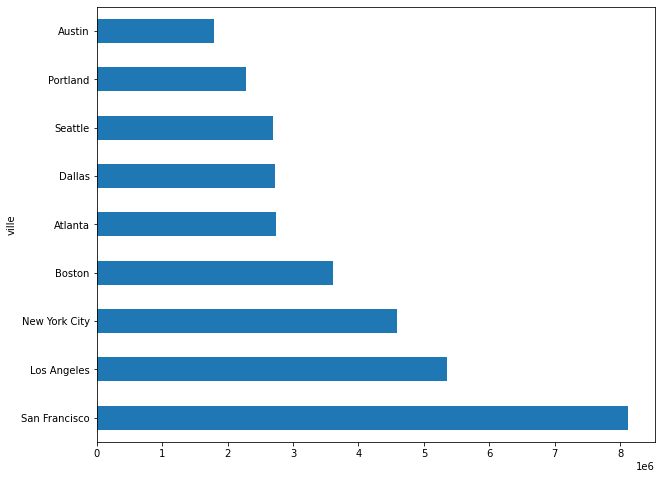

In [93]:
df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False).plot.barh(figsize=(10, 8))

On a fait un meilleur chiffre d'affaire à San Francisco

In [94]:
ca_by_ville = df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False)

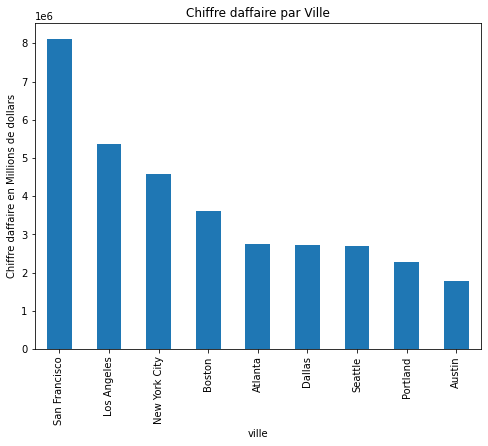

In [95]:
ca_by_ville.plot(kind='bar', figsize=(8, 6))
plt.ylabel('Chiffre daffaire en Millions de dollars')
plt.title('Chiffre daffaire par Ville')
plt.show()

## Etude des heure de publicité pour augmenter les ventes

A quelle heure on vend le plus ?

In [96]:
df_clean['heure'] = df_clean.index.hour
df_clean['time'] = df_clean.index.time

In [97]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [98]:
df_clean.groupby('heure')['chiffre_daffaire'].sum().sort_values(ascending=False)

heure
19    2370005.59
12    2269676.91
11    2267169.73
20    2242856.37
18    2176209.65
13    2118394.83
17    2086082.23
14    2045085.42
21    2013288.02
10    1907179.29
15    1900151.56
16    1864530.92
9     1612498.90
22    1578173.21
8     1181363.76
23    1161803.96
7      734595.75
0      698694.76
1      447663.86
6      441523.14
2      234191.08
5      224313.72
4      161350.57
3      142976.54
Name: chiffre_daffaire, dtype: float64

In [99]:
ca_par_heure = pd.DataFrame(df_clean.groupby('heure')['chiffre_daffaire'].sum())

In [100]:
ca_par_heure

,chiffre_daffaire
heure,
0,698694.76
1,447663.86
2,234191.08
3,142976.54
4,161350.57
5,224313.72
6,441523.14
7,734595.75
8,1181363.76


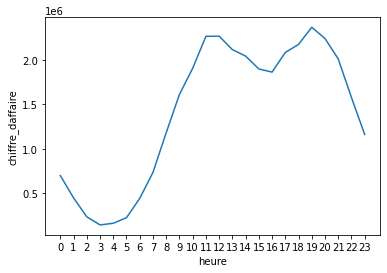

In [101]:
sns.lineplot(data=ca_par_heure['chiffre_daffaire'])
plt.xticks(ticks=range(0, 24))
plt.show()

#### On devrait afficher la publicité entre 10 et 11 et entre 18 et 19.

## Les produits achetés ensemble

Les produits vendus ensemble ont le même `Order ID`.

In [102]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


Les ventes avec plus d'un produit : 

In [103]:
df_m = df_clean[df_clean['Order ID'].duplicated(keep=False)].copy()
df_m

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 07:29:00,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",January,11.99,New York City,7,07:29:00
2019-01-01 07:29:00,144804,iPhone,1,700.00,"628 Lake St, New York City, NY 10001",January,700.00,New York City,7,07:29:00
2019-01-01 11:25:00,148074,USB-C Charging Cable,1,11.95,"6 Johnson St, Atlanta, GA 30301",January,11.95,Atlanta,11,11:25:00
2019-01-01 11:25:00,148074,Google Phone,1,600.00,"6 Johnson St, Atlanta, GA 30301",January,600.00,Atlanta,11,11:25:00
2019-01-01 12:02:00,148450,iPhone,1,700.00,"761 Lakeview St, Dallas, TX 75001",January,700.00,Dallas,12,12:02:00
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 00:10:00,311386,Apple Airpods Headphones,1,150.00,"730 Pine St, San Francisco, CA 94016",January,150.00,San Francisco,0,00:10:00
2020-01-01 00:22:00,297817,Lightning Charging Cable,2,14.95,"519 13th St, New York City, NY 10001",January,29.90,New York City,0,00:22:00
2020-01-01 00:22:00,297817,iPhone,1,700.00,"519 13th St, New York City, NY 10001",January,700.00,New York City,0,00:22:00


In [104]:
def concat_produit_par_order_id(p: list):
  return ";".join(p)

In [105]:
df_m.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

Order ID
141275              USB-C Charging Cable;Wired Headphones
141290     Apple Airpods Headphones;AA Batteries (4-pack)
141365                   Vareebadd Phone;Wired Headphones
141384                  USB-C Charging Cable;Google Phone
141450            Bose SoundSport Headphones;Google Phone
                               ...                       
319536                Macbook Pro Laptop;Wired Headphones
319556                      Google Phone;Wired Headphones
319584                            Wired Headphones;iPhone
319596                    iPhone;Lightning Charging Cable
319631    Lightning Charging Cable;34in Ultrawide Monitor
Name: Product, Length: 6928, dtype: object

In [106]:
ensemble = df_m.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

In [107]:
from itertools import combinations
from collections import Counter

count = Counter()

In [108]:
Counter(combinations(['a', 'c', 'b'], 2))

Counter({('a', 'c'): 1, ('a', 'b'): 1, ('c', 'b'): 1})

In [109]:
for i, j in combinations(['a', 'c', 'b'], 2):
    print(i, j)

a c
a b
c b


In [110]:
ensemble.to_list()

['USB-C Charging Cable;Wired Headphones',
 'Apple Airpods Headphones;AA Batteries (4-pack)',
 'Vareebadd Phone;Wired Headphones',
 'USB-C Charging Cable;Google Phone',
 'Bose SoundSport Headphones;Google Phone',
 'iPhone;Apple Airpods Headphones',
 'Google Phone;Apple Airpods Headphones',
 'Wired Headphones;iPhone;Apple Airpods Headphones',
 'USB-C Charging Cable;Apple Airpods Headphones',
 'Wired Headphones;Lightning Charging Cable',
 'iPhone;Lightning Charging Cable',
 'Bose SoundSport Headphones;27in FHD Monitor',
 'USB-C Charging Cable;Google Phone',
 'iPhone;Wired Headphones',
 'USB-C Charging Cable;Google Phone',
 'AA Batteries (4-pack);AAA Batteries (4-pack)',
 'Wired Headphones;Vareebadd Phone;USB-C Charging Cable',
 'USB-C Charging Cable;Google Phone',
 'Vareebadd Phone;Wired Headphones',
 'Lightning Charging Cable;34in Ultrawide Monitor',
 'USB-C Charging Cable;Wired Headphones',
 'Bose SoundSport Headphones;Lightning Charging Cable',
 'Wired Headphones;Google Phone',
 'Wired

In [111]:
for achat in ensemble.to_list():
    products = achat.split(';')
#     print(products)
    count.update(Counter(combinations(products, 2)))

In [112]:
count

Counter({('USB-C Charging Cable', 'Wired Headphones'): 109,
         ('Apple Airpods Headphones', 'AA Batteries (4-pack)'): 39,
         ('Vareebadd Phone', 'Wired Headphones'): 78,
         ('USB-C Charging Cable', 'Google Phone'): 480,
         ('Bose SoundSport Headphones', 'Google Phone'): 104,
         ('iPhone', 'Apple Airpods Headphones'): 181,
         ('Google Phone', 'Apple Airpods Headphones'): 12,
         ('Wired Headphones', 'iPhone'): 223,
         ('Wired Headphones', 'Apple Airpods Headphones'): 63,
         ('USB-C Charging Cable', 'Apple Airpods Headphones'): 32,
         ('Wired Headphones', 'Lightning Charging Cable'): 62,
         ('iPhone', 'Lightning Charging Cable'): 494,
         ('Bose SoundSport Headphones', '27in FHD Monitor'): 20,
         ('iPhone', 'Wired Headphones'): 229,
         ('AA Batteries (4-pack)', 'AAA Batteries (4-pack)'): 38,
         ('Wired Headphones', 'Vareebadd Phone'): 69,
         ('Wired Headphones', 'USB-C Charging Cable'): 89,
    

In [113]:
count.most_common(1)

[(('iPhone', 'Lightning Charging Cable'), 494)]

In [114]:
for ensemble, c in count.most_common(10):
    print(ensemble, c)

('iPhone', 'Lightning Charging Cable') 494
('Lightning Charging Cable', 'iPhone') 489
('Google Phone', 'USB-C Charging Cable') 486
('USB-C Charging Cable', 'Google Phone') 480
('iPhone', 'Wired Headphones') 229
('Wired Headphones', 'iPhone') 223
('Google Phone', 'Wired Headphones') 213
('Wired Headphones', 'Google Phone') 197
('Vareebadd Phone', 'USB-C Charging Cable') 182
('iPhone', 'Apple Airpods Headphones') 181


# Produit le plus vendu

In [115]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [116]:
df_clean.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        30487
AA Batteries (4-pack)         27148
USB-C Charging Cable          23555
Lightning Charging Cable      22841
Wired Headphones              20201
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
27in FHD Monitor               7429
iPhone                         6732
27in 4K Gaming Monitor         6134
34in Ultrawide Monitor         6076
Google Phone                   5440
Flatscreen TV                  4724
Macbook Pro Laptop             4645
20in Monitor                   4058
ThinkPad Laptop                4054
Vareebadd Phone                2023
LG Washing Machine              649
LG Dryer                        640
Name: Quantity Ordered, dtype: int32